#### Importing Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading & Displaying Tables

In [19]:
customer = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")
products = pd.read_csv("Products.csv")

print("Customer Table")
customer.head(5)

Customer Table


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,10-07-2022
1,C0002,Elizabeth Lutz,Asia,13-02-2022
2,C0003,Michael Rivera,South America,07-03-2024
3,C0004,Kathleen Rodriguez,South America,09-10-2022
4,C0005,Laura Weber,Asia,15-08-2022


In [20]:
print("Transactions Table")
transactions.head(5)

Transactions Table


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,25-08-2024 12:38,1,300.68,300.68
1,T00112,C0146,P067,27-05-2024 22:23,1,300.68,300.68
2,T00166,C0127,P067,25-04-2024 07:38,1,300.68,300.68
3,T00272,C0087,P067,26-03-2024 22:55,2,601.36,300.68
4,T00363,C0070,P067,21-03-2024 15:10,3,902.04,300.68


In [21]:
print("Products Table")
products.head(5)

Products Table


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


#### Data Pre-Processing

In [22]:
cusNull = customer.isnull().sum() # checking for null values in customer dataset
pdtNull = products.isnull().sum() # checking for null values in product dataset
traNull = transactions.isnull().sum() # checking for null values in transactions dataset

print("=== Customer Dataset ===")
print(cusNull)

print("\n")

print("=== Product Dataset ===")
print(pdtNull)

print("\n")

print("=== Transactions Dataset ===")
print(traNull)

=== Customer Dataset ===
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


=== Product Dataset ===
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


=== Transactions Dataset ===
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [23]:
print("=== Descriptive Statistics === \n")

print(" === Customer === \n")
cusds = customer.describe()
print(cusds)
print("\n")

print(" === Products === \n")
pdtds = products.describe()
print(pdtds)
print("\n")

print(" === Transactions === \n")
trands = transactions.describe()
print(trands)
print("\n")

=== Descriptive Statistics === 

 === Customer === 

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  11-11-2024
freq            1                 1             59           3


 === Products === 

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


 === Transactions === 

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000




In [24]:
print("Customer columns : ", customer.columns)
print("\n")
print("Product columns :", products.columns)
print("\n")
print("Transactions columns :", transactions.columns)

Customer columns :  Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')


Product columns : Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')


Transactions columns : Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


#### Merging the Dataset

In [25]:
merged_data = transactions.merge(customer, on='CustomerID', how='left')
final_data = merged_data.merge(products, on='ProductID', how='left')

final_data.head(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,25-08-2024 12:38,1,300.68,300.68,Andrea Jenkins,Europe,03-12-2022,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,27-05-2024 22:23,1,300.68,300.68,Brittany Harvey,Asia,04-09-2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,25-04-2024 07:38,1,300.68,300.68,Kathryn Stevens,Europe,04-04-2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,26-03-2024 22:55,2,601.36,300.68,Travis Campbell,South America,11-04-2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,21-03-2024 15:10,3,902.04,300.68,Timothy Perez,Europe,15-03-2022,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [26]:
final_data.columns # Column names in merged dataset

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

#### Top Selling Products


Top-Selling Products:
ProductID
P059    19
P029    17
P062    16
P079    16
P054    16
P061    16
P048    15
P022    15
P096    15
P049    15
Name: count, dtype: int64


C:\Users\jofin\AppData\Local\Temp\ipykernel_11356\3142143320.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")


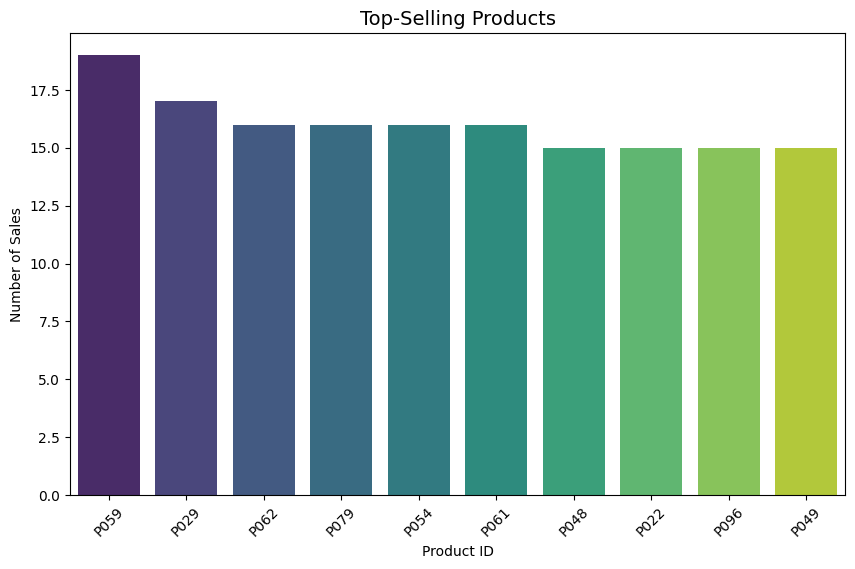

In [27]:
# Top-selling products
top_products = final_data['ProductID'].value_counts().head(10)
print("\nTop-Selling Products:")
print(top_products)

# Plot for top-selling products
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("Top-Selling Products", fontsize=14)
plt.xlabel("Product ID")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()

##### Insights
- Product ID P059 has the highest sales, indicating it is the best-selling product overall.
- The product P059 is SoundWave Jeans from Clothing section
- Followed by that P029 and P062 which are TechPro Headphones from Electronics section and HomeSense Novel from Books section

#### Region Based Analysis

In [32]:
final_data["Region"].unique()

array(['Europe', 'Asia', 'South America', 'North America'], dtype=object)


Sales by Region:
Region
South America    304
North America    244
Europe           234
Asia             218
Name: TransactionID, dtype: int64


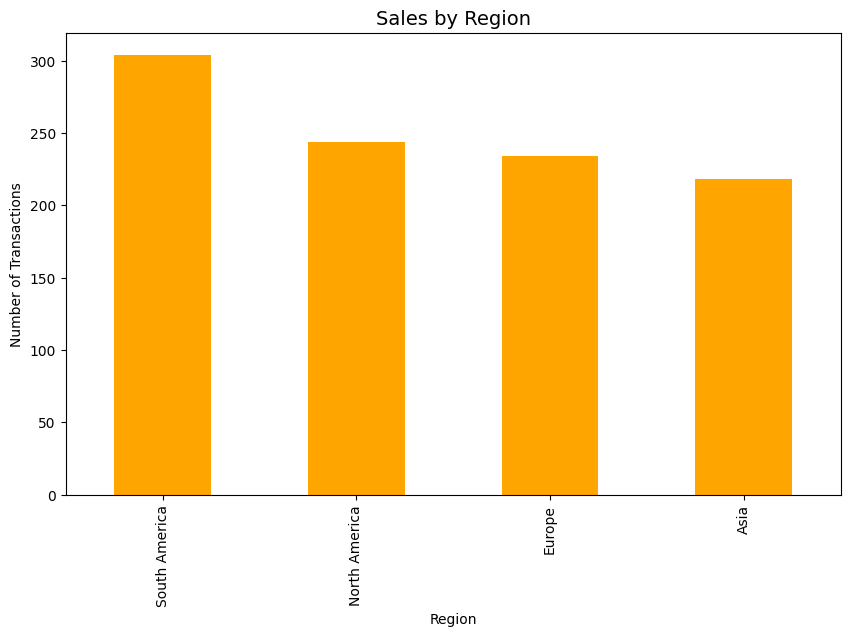

In [28]:
# Geographic analysis
region_sales = final_data.groupby(
    'Region')['TransactionID'].count().sort_values(ascending=False)
print("\nSales by Region:")
print(region_sales)

# Plot for sales by region
plt.figure(figsize=(10, 6))
region_sales.plot(kind='bar', color='orange')
plt.title("Sales by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Number of Transactions")
plt.show()

- South America has by far the highest total sales, over 300 transactions.
- North America has the second highest total sales, around 250 transactions.
- Europe has the third highest total sales, around 200 transactions.
- Asia has the lowest total sales, around 175 transactions.
- Focus on the sales in South America and find out the top sold product in south America 

##### I am adding my findings on the product which is most sold in South America below graph


Top 10 Products Sold in South America:
ProductName
ActiveWear Smartwatch       38
ActiveWear Textbook         38
HomeSense Desk Lamp         29
SoundWave Cookbook          28
ActiveWear Rug              27
TechPro Headphones          22
ActiveWear Cookware Set     22
SoundWave Novel             22
SoundWave Desk Lamp         21
ActiveWear Running Shoes    21
Name: Quantity, dtype: int64


C:\Users\jofin\AppData\Local\Temp\ipykernel_11356\3088478475.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


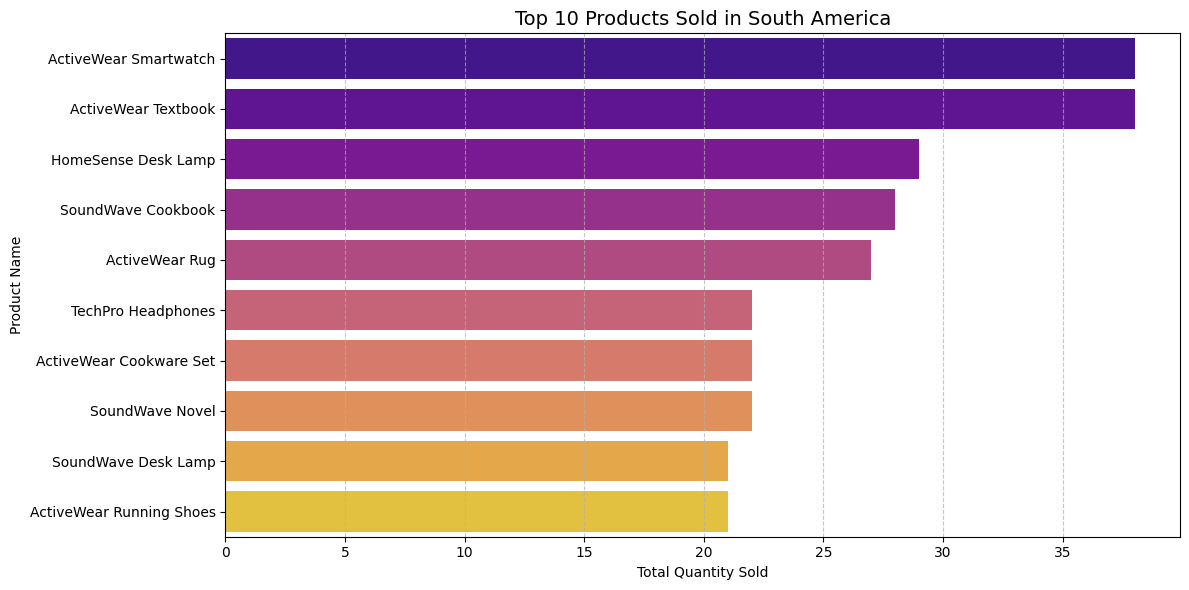

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for South America
south_america_data = final_data[final_data['Region'] == 'South America']

# Group by ProductName and calculate total Quantity
top_10_products_south_america = (
    south_america_data.groupby('ProductName')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Print top 10 products
print("\nTop 10 Products Sold in South America:")
print(top_10_products_south_america)

# Plot the top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_10_products_south_america.values,
    y=top_10_products_south_america.index,
    palette="plasma"
)
plt.title("Top 10 Products Sold in South America", fontsize=14)
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Here it is:  
The most sold product is Active Smartwatch followed by ActiveWear text book, HomeSense Desklamp

#### Seasonal trends


Sales by Month:
TransactionMonth
1     107
2      77
3      80
4      86
5      86
6      69
7      96
8      94
9      96
10     70
11     57
12     82
Name: TransactionID, dtype: int64


C:\Users\jofin\AppData\Local\Temp\ipykernel_11356\560099899.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_data['TransactionMonth'] = pd.to_datetime(


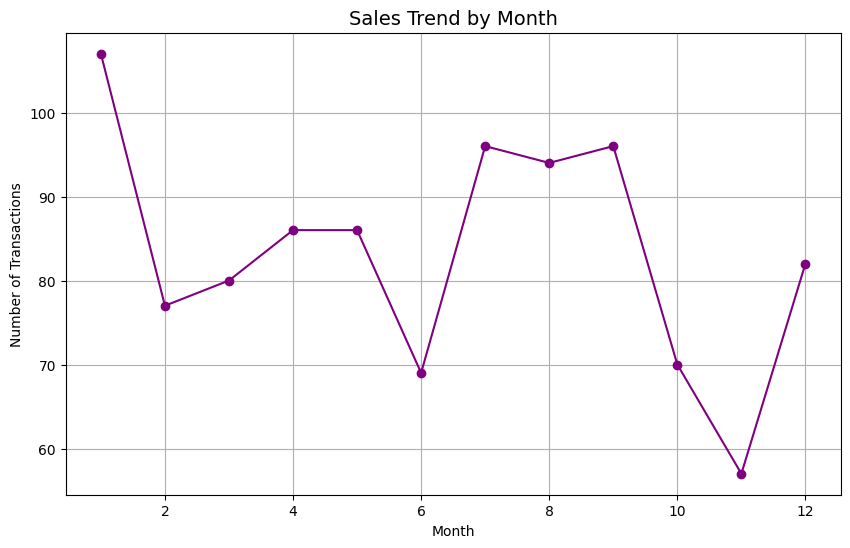

In [29]:
# Seasonal trends
final_data['TransactionMonth'] = pd.to_datetime(
    final_data['TransactionDate']).dt.month
monthly_sales = final_data.groupby('TransactionMonth')['TransactionID'].count()
print("\nSales by Month:")
print(monthly_sales)

# Plot for seasonal trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title("Sales Trend by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

##### Insights
- The highest number of transactions occurs in January, indicating a strong start to the year. This could be attributed to seasonal demand, promotions, or holidays.
- There are notable dips in sales during June and October, suggesting either off-season periods or potential issues such as reduced marketing efforts or inventory shortages during these months.
- Sales tend to recover following declines, particularly after June and October. This might indicate responsive strategies such as discounts or targeted campaigns.
- The number of transactions stabilizes in the spring months, which could be due to steady demand or a lack of external influences.
- December shows a recovery in sales, likely driven by holiday shopping or year-end promotions.

##### I can provide some more insights regarding monthly highest sold product focusing on one region (here ASIA) which category, see below graph

C:\Users\jofin\AppData\Local\Temp\ipykernel_11356\4023064657.py:9: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  asia_data['Month'] = pd.to_datetime(asia_data['TransactionDate']).dt.month
C:\Users\jofin\AppData\Local\Temp\ipykernel_11356\4023064657.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asia_data['Month'] = pd.to_datetime(asia_data['TransactionDate']).dt.month


Most Sold Category in Asia (Month-wise):
    Month     Category  Quantity
0       1  Electronics        22
1       2   Home Decor        12
2       3  Electronics        16
3       4     Clothing        15
4       5   Home Decor        18
5       6        Books        15
6       7     Clothing        22
7       8     Clothing        20
8       9  Electronics        16
9      10   Home Decor        11
10     11     Clothing        19
11     12     Clothing        32

Highest-Selling Product in Asia:
ProductName
HomeSense T-Shirt    28
Name: Quantity, dtype: int64


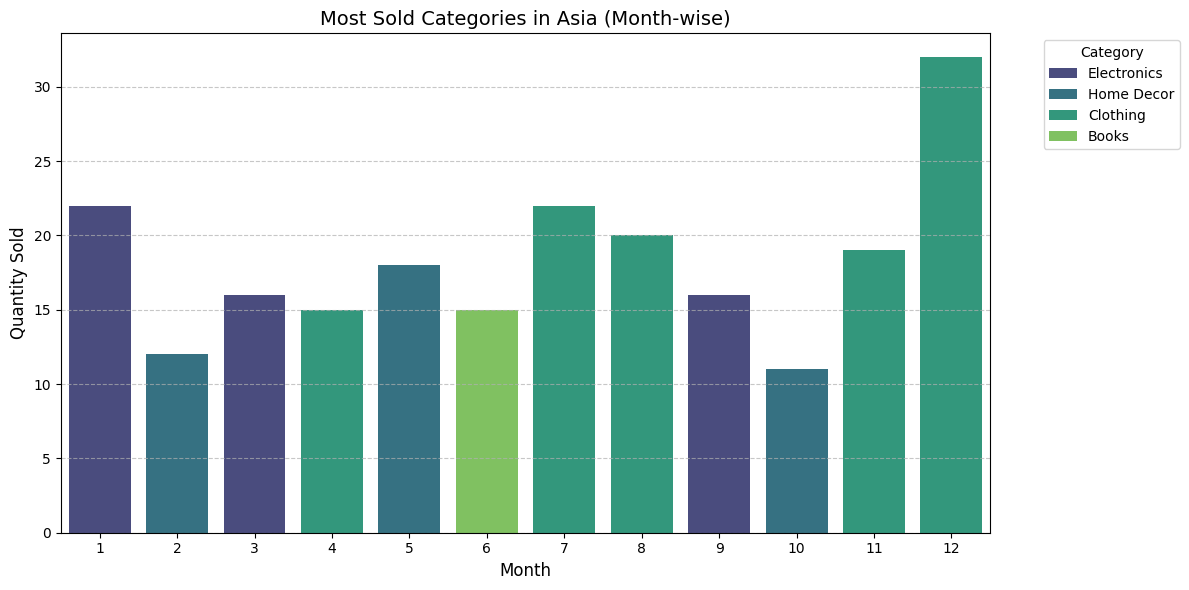

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Asia
asia_data = final_data[final_data['Region'] == 'Asia']

# Add a 'Month' column from the 'TransactionDate'
asia_data['Month'] = pd.to_datetime(asia_data['TransactionDate']).dt.month

# Group by Month and Category to find total Quantity sold per Category per Month
category_month_sales = (
    asia_data.groupby(['Month', 'Category'])['Quantity']
    .sum()
    .reset_index()
    .sort_values(by=['Month', 'Quantity'], ascending=[True, False])
)

# Find the most sold category for each month
top_category_per_month = category_month_sales.groupby(
    'Month').first().reset_index()

# Find the most sold product in Asia
top_product_asia = (
    asia_data.groupby('ProductName')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(1)
)

# Print the insights
print("Most Sold Category in Asia (Month-wise):")
print(top_category_per_month)

print("\nHighest-Selling Product in Asia:")
print(top_product_asia)

# Visualization of top categories per month
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Month',
    y='Quantity',
    hue='Category',
    data=top_category_per_month,
    palette='viridis'
)
plt.title('Most Sold Categories in Asia (Month-wise)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Probably this visualization give an inference of category sales based on climatic seasons
- November(11) and December(12) : Clothing shows the highest gross sales during these months. This indicates that customers prioritize purchasing clothes in colder weather. Marketing efforts should focus on clothing sales during this period.
- And in February(2) which is following the cold months, often sees people in a happy and refreshed state, prompting them to purchase Home Decor products to enhance their living spaces. Similarly, the month of October (10) experiences a comparable climate.
- The June month(6) lazy to go out so people love to sit and read purchase books lot on that month

#### Top 10 High-Value Customers


Top 10 High-Value Customers:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


C:\Users\jofin\AppData\Local\Temp\ipykernel_11356\1959305705.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_revenue.index.astype(str),


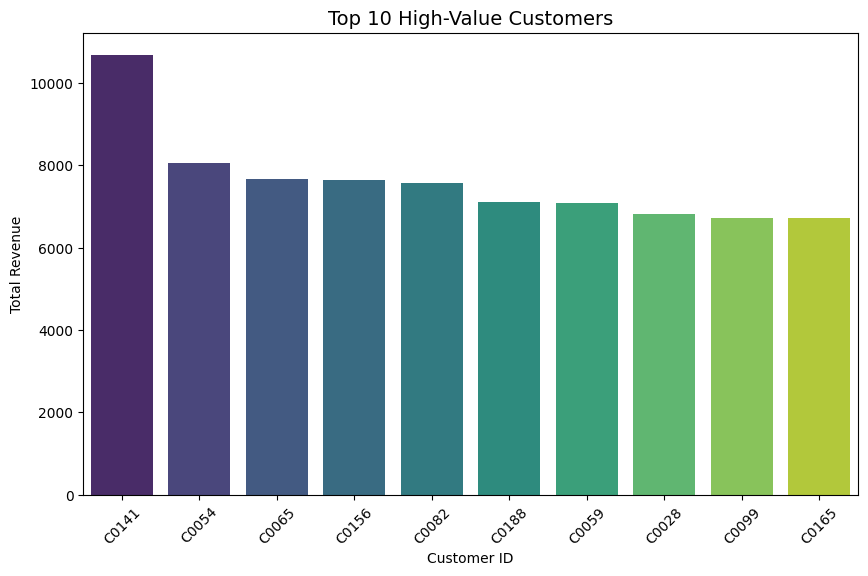

In [30]:
# High-Value Customers
customer_revenue = final_data.groupby(
    'CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 High-Value Customers:")
print(customer_revenue)

# Plot for High-Value Customers
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_revenue.index.astype(str),
            y=customer_revenue.values, palette="viridis")
plt.title("Top 10 High-Value Customers", fontsize=14)
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

##### Insights
- The top one value customer is C0141 who is Paul Parsons from Europe
- Paul spend above 10k
- Followed that the second is C0054 and C0065, Bruce Rhodes from Asia and Gerald Hines from North America


#### Top Products in Each Category


Top Products in Each Category:
       Category            ProductName  Quantity
8         Books     SoundWave Cookbook        78
15     Clothing      ActiveWear Jacket        76
33  Electronics  ActiveWear Smartwatch       100
59   Home Decor    HomeSense Desk Lamp        81


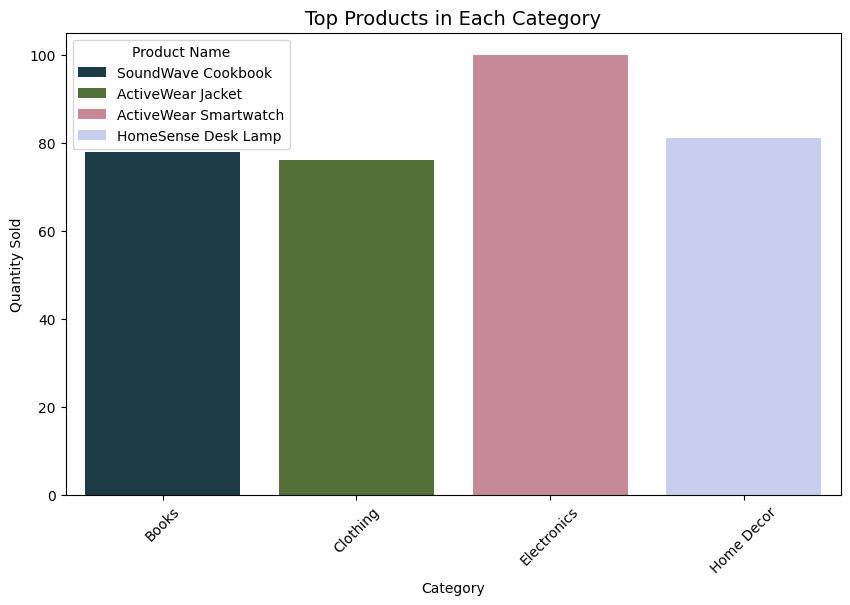

In [31]:
# Top Products in Each Category
top_products_per_category = final_data.groupby(['Category', 'ProductName'])[
    'Quantity'].sum().reset_index()
top_products_per_category = top_products_per_category.sort_values(
    ['Category', 'Quantity'], ascending=[True, False]).groupby('Category').head(1)
print("\nTop Products in Each Category:")
print(top_products_per_category)

# Plot for Top Products per Category
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_per_category, x='Category',
            y='Quantity', hue='ProductName', dodge=False, palette="cubehelix")
plt.title("Top Products in Each Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Quantity Sold")
plt.legend(title="Product Name")
plt.xticks(rotation=45)
plt.show()

##### Insights
- The "Electronics" category has the highest selling product, with a quantity sold 100.
- The highest sold item in category "Electronics" is ActiveWear Smartwatch.
- The "Home Decor" category has the second highest selling product, with a quantity 81.
- The highest sold item in category "Home Decor" is Home sense desk lamp.
- The "Books" category has the third highest selling product, with a quantity sold around 78 where highest sold item is Soundwave Cookbook.
- The "Clothing" category has the lowest selling product, with a quantity sold 76.
- From the lowest category the highest selling product is Active wear Jacket